In [4]:
from numpy import *
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


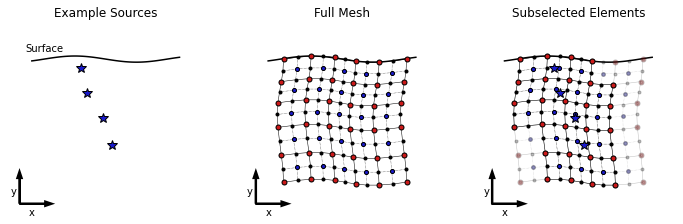

In [36]:
from lwsspy.GF.lagrange import gll_nodes

# Polynoimal degree and corresponding GLL points
npol = 2
ngll = npol + 1

# Number of elements
ne = 5

# GLL points
xi, _, _ = gll_nodes(npol)

# Element length
el = 1/ne

# Ibool coordinate storage
ibool = zeros((ne, ngll), int)
xg = zeros(npol*ne+1)

# Loop over elements to define the xglob coordinates
k = 0
for i in range(0, ne):
    ibool[i, 0] = k
    for j in range(1, ngll):
        k += 1
        ibool[i, j] = k
        xg[k] = i*el + .5*(xi[j]+1)*el


xx, yy = meshgrid(xg, xg)

# x = linspace(0,1,nel*(ngll-1)+1)
# y = linspace(0,1,nel*(ngll-1)+1)

# xx, yy = meshgrid(x,y)

pert = 0.025

def pertmesh(x,y,pert, scalex=1.0, scaley=1.0):
    return x + pert*(sin(2*pi*x/scalex) + cos(2*pi*y/scaley)), y + \
        pert*(sin(2*pi*x/scalex) - cos(2*pi*y/scaley))
        
xxp, yyp = pertmesh(xx,yy,pert)


# Remove vertain elements
xxpn = xxp.copy()
yypn = yyp.copy()

# Source location
xs = [0.3, 0.35, 0.475, 0.55]
ys = [0.9, 0.7, 0.5, 0.275]

# Nan locations for the selected grid
# Bottom left
xxpn[:4,:2] = np.nan
yypn[:4,:2] = np.nan

# # topright
xxpn[:, -2:] = np.nan
yypn[:, -2:] = np.nan

# # topright left
xxpn[-2:, -4:] = np.nan
yypn[-2:, -4:] = np.nan

# # bottom right
xxpn[:2, -2:] = np.nan
yypn[:2, -2:] = np.nan


def axlims():
    axis('equal')
    axis('off')
    xlim(-0.3, 1.3)
    ylim(-0.3, 1.3)
    
def plot_axis():
    
    lw = 1.0
    plot([0.0, -0.2, -0.2, -0.2], [-0.2, -0.2, -0.2, 0.0],
         'k-', lw=lw*2)#, solid_joinstyle='miter')
    arrow(-0.2, -0.2, 0.2, 0.0, width=0.02, lw=lw,
          edgecolor='none', facecolor='k')
    arrow(-0.2, -0.2, 0.0, 0.2, width=0.02, lw=lw,
          edgecolor='none', facecolor='k')
    annotate('x', xy=(-0.1, -0.225), ha='center', va='top')
    annotate('y', xy=(-0.225, -0.1), ha='right',
             va='center')

def plot_surface(label=False):
    
    x = linspace(-0.1, 1.1, 100)
    plot(x, pertmesh(x, 1.0, pert)[1], 'k', lw=1.5)
    if label:
        annotate('Surface', xy=(0.0, pertmesh(0.0, 1.0, pert)[1]+0.05), ha='center', va='bottom')
    
def plot_mesh(xxp, yyp, alpha=1.0, ngll=3):
    
    lw = 0.5
    controlsize = 5
    midsize = 4
    gllsize = 3
    
    dgll = ngll-1
    
    for _k, (i, j) in enumerate(zip(xxp, yyp)):
    
        if _k % dgll == 0:
            plot(i, j, 'k', lw=lw, alpha=alpha)
        else:
            plot(i, j, 'k:', lw=lw, alpha=alpha)


    for _k, (i, j) in enumerate(zip(xxp.T, yyp.T)):
        if _k % dgll == 0:
            plot(i, j, 'k', lw=lw, alpha=alpha)
        else:
            plot(i, j, 'k:', lw=lw, alpha=alpha)

    # Overall GLL points
    plot(xxp, yyp, 'ko', markersize=gllsize, alpha=alpha)
    
    # Control points
    plot(xxp[::dgll, ::dgll], yyp[::dgll, ::dgll], 'o',
        markersize=controlsize, markerfacecolor=(0.8, 0.1, 0.1),
        markeredgecolor='k', alpha=alpha)
    
    # Center points
    plot(xxp[1::dgll, 1::dgll], yyp[1::dgll, 1::dgll], 'o',
        markersize=midsize, markerfacecolor=(0.1, 0.1, 0.8),
        markeredgecolor='k', alpha=alpha)
    


fig = figure(figsize=(12,3.5))

subplot(1,3,1)
axlims()
plot_axis()
title("Example Sources")
plot_surface(True)
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k')


subplot(1,3,2)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxp,yyp, ngll=ngll)
axis('off')
title("Full Mesh")

subplot(1,3,3)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxp, yyp, alpha=0.25, ngll=ngll)
plot_mesh(xxpn, yypn, ngll=ngll)
plot(xs, ys, '*', markersize=10,markerfacecolor=(0.1,0.1,0.8),
     markeredgecolor='k')
title("Subselected Elements")
axis('off')


plt.savefig('element-selection.pdf', dpi=300)


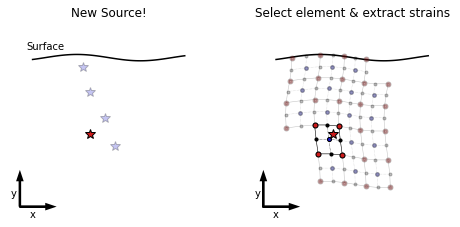

In [37]:
fig = figure(figsize=(8, 3.5))

subplot(1, 2, 1)
axlims()
plot_axis()
title("New Source!")
plot_surface(True)
xsn= 0.35
ysn = 0.375
plot(xsn, ysn, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k')
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k', alpha=0.25)

xxps = xxp[2:5, 2:5]
yyps = yyp[2:5, 2:5]

subplot(1, 2, 2)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxpn, yypn, alpha=0.25)
plot_mesh(xxps, yyps)
plot(xsn, ysn, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k')
axis('off')
title("Select element & extract strains")

# subplot(1, 3, 3)
# axlims()
# plot_axis()
# plot_surface()
# plot_mesh(xxp, yyp, alpha=0.25)
# plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
#      markeredgecolor='k')
# title("Subselected Elements")
# axis('off')

plt.savefig('single-seismogram.pdf', dpi=300)


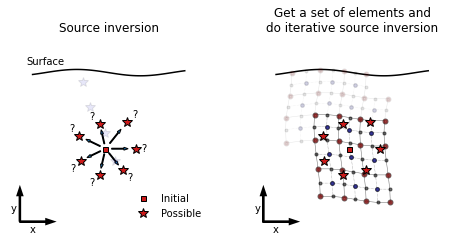

In [38]:
fig = figure(figsize=(8, 3.5))

Ns = 7
random.seed(1)
R = 0.2
r = R + 0.1*random.rand(Ns)
theta = arange(0, 2*pi,2*pi/Ns)
dx = r*cos(theta)
dy = r*sin(theta)

subplot(1, 2, 1)
axlims()
plot_axis()
title("Source inversion")
plot_surface(True)
xsn = 0.475
ysn = 0.375

plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k', alpha=0.1)
plot(xsn, ysn, 's', markersize=5, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k', label='Initial')
plot(xsn+dx, ysn+dy, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k', label="Possible")
for i in range(Ns):
    annotate("?", xy=(xsn+dx[i]+R*0.3*np.sign(dx[i]), ysn+dy[i]+R*0.3*np.sign(dy[i])), va='center', ha='center')
    arrow(xsn+dx[i]*0.2, ysn + dy[i]*0.2, dx[i]*0.4, dy[i]*0.4, width=0.0075)
legend(frameon=False, loc='lower right')

xxps = xxp[0:7, 2:9]
yyps = yyp[0:7, 2:9]

subplot(1, 2, 2)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxpn, yypn, alpha=0.1)
plot_mesh(xxps, yyps,alpha=0.5)
plot(xsn, ysn, 's', markersize=5, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k', label='Initial')
plot(xsn+dx, ysn+dy, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k', label="Possible")
axis('off')
title("Get a set of elements and\ndo iterative source inversion")

plt.savefig('source-inversion.pdf', dpi=300)


In [39]:
from lwsspy.GF.lagrange import gll_nodes

# Polynoimal degree and corresponding GLL points
npol = 3
ngll = npol + 1

# Number of elements
ne = 1

# GLL points
xi, _, _ = gll_nodes(npol)

# Element length
el = 1/ne

# Ibool coordinate storage
ibool = zeros((ne, ngll), int)
xg = zeros(npol*ne+1)

# Loop over elements to define the xglob coordinates
k = 0
for i in range(0, ne):
    ibool[i, 0] = k
    for j in range(1, ngll):
        k += 1
        ibool[i, j] = k
        xg[k] = i*el + .5*(xi[j]+1)*el


xx, yy = meshgrid(xg, xg)


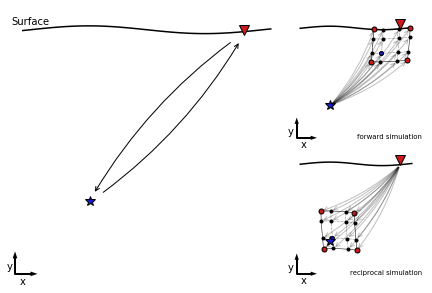

In [40]:
pert=0.05
xxpr,yypr= pertmesh(xx+2,yy+2,pert, scalex=3.0, scaley=3.0)
xxps, yyps = pertmesh(xx+0.5, yy+0.5, pert, scalex=3.0, scaley=3.0)


xr,yr = pertmesh(2.75, 3.0, pert)
xs,ys = pertmesh(0.8, 0.8, pert)

def axlims2(big=False, equal=True):
    if equal:
        axis('equal')
    axis('off')
    
    if big:
        xlim(-0.3, 3.3)
        ylim(-0.3, 3.3)
    else:
        xlim(-0.5, 3.5)
        ylim(-0.5, 3.75)


def plot_axis(big=False):

    lw = 1.0
    
    if big:
        plot([0.0, -0.2, -0.2, -0.2], [-0.2, -0.2, -0.2, 0.0],
         'k-', lw=lw*2)  # , solid_joinstyle='miter')
        arrow(-0.2, -0.2, 0.2, 0.0, width=0.02, lw=lw,
            edgecolor='none', facecolor='k')
        arrow(-0.2, -0.2, 0.0, 0.2, width=0.02, lw=lw,
            edgecolor='none', facecolor='k')
        
        annotate('x', xy=(-0.1, -0.225), ha='center', va='top')
        annotate('y', xy=(-0.225, -0.1), ha='right',
             va='center')
    
    else:
        plot([0.2, -0.2, -0.2, -0.2], [-0.2, -0.2, -0.2, 0.2],
             'k-', lw=lw*2)  # , solid_joinstyle='miter')
        arrow(-0.2, -0.2, 0.4, 0.0, width=0.04, lw=lw,
            edgecolor='none', facecolor='k')
        arrow(-0.2, -0.2, 0.0, 0.4, width=0.04, lw=lw,
            edgecolor='none', facecolor='k')
        annotate('x', xy=(0.0, -0.225), ha='center', va='top')
        annotate('y', xy=(-0.3, 0.0), ha='right',
             va='center')
    

def plot_surface2(label=False):

    x = linspace(-0.1, 3.1, 100)
    plot(x, pertmesh(x, 3.0, pert, scalex=3.0, scaley=3.0)[1], 'k', lw=1.5)
    if label:
        annotate('Surface', xy=(0.0, pertmesh(0.0, 3.0, pert, scalex=3.0, scaley=3.0)
                 [1]+0.05), ha='center', va='bottom')

from matplotlib.gridspec import GridSpec
from lwsspy.plot import plot_label
gs = GridSpec(2,2,width_ratios=[2,1], wspace=0, hspace=0)
fig = plt.figure(figsize=(7.5,5))

fig.add_subplot(gs[:,0])
plot_axis(True)
axlims2(True)
plot_surface2(True)
plot(xr, yr + 0.05, 'v', markersize=10, markerfacecolor=(0.8,0.1,0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1,0.1,0.8), markeredgecolor='k')

annotate("",
         xy=(xr-0.05, yr-0.1), xycoords='data',
         xytext=(xs+0.15, ys+0.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.1"),
            )

annotate("",
            xy=(xs+0.05, ys+0.1), xycoords='data',
            xytext=(xr-0.15, yr-0.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.1"),
            )


fig.add_subplot(gs[0,1])
plot_axis()
axlims2()
plot_surface2()

for _x, _y in zip(xxpr.flatten(), yypr.flatten()):
    annotate("",
            xy=(_x, _y), xycoords='data',
            xytext=(xs, ys), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=0.1",
                                alpha=0.25))

plot_mesh(xxpr,yypr, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10, markerfacecolor=(0.8,0.1,0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1,0.1,0.8), markeredgecolor='k')
plot_label(gca(), "forward simulation",
           fontsize='x-small', location=4, box=False,)

fig.add_subplot(gs[1,1])
plot_axis()
axlims2()
plot_surface2()

for _x, _y in zip(xxps.flatten(), yyps.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xr, yr), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.1",
                             alpha=0.25))

plot_mesh(xxps,yyps, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10, markerfacecolor=(0.8,0.1,0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1,0.1,0.8), markeredgecolor='k')
plot_label(gca(), "reciprocal simulation", fontsize='x-small', location=4, box=False,)
savefig('reciprocity.pdf')

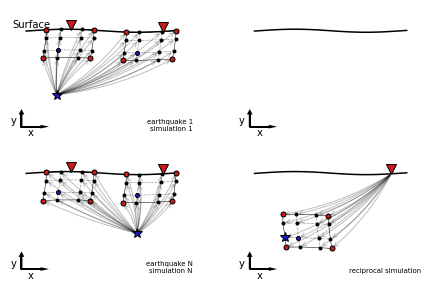

In [47]:
gs = GridSpec(2,2,width_ratios=[1,1], wspace=0.2, hspace=0.1)
fig = plt.figure(figsize=(7.5,5))

# Add new elements
xxpr2,yypr2= pertmesh(xx+0.25,yy+2,pert, scalex=3.0, scaley=3.0)
xxps2, yyps2 = pertmesh(xx+2.0, yy+0.5, pert, scalex=3.0, scaley=3.0)

# Add stations and sources
xr,yr = pertmesh(2.75, 3.0, pert, scalex=3.0, scaley=3.0)
xr2,yr2 = pertmesh(0.75, 3.0, pert, scalex=3.0, scaley=3.0)
xs,ys = pertmesh(0.5, 0.8, pert, scalex=3.0, scaley=3.0)
xs2,ys2 = pertmesh(2.3, 1.0, pert, scalex=3.0, scaley=3.0)


fig.add_subplot(gs[0,0])
plot_axis()
axlims2(equal=False)
plot_surface2(True)

for _x, _y in zip(xxpr.flatten(), yypr.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xs, ys), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=0.1",
                             alpha=0.25))
    
for _x, _y in zip(xxpr2.flatten(), yypr2.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xs, ys), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.05",
                             alpha=0.25))

plot_mesh(xxpr, yypr, ngll=ngll)
plot_mesh(xxpr2, yypr2, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xr2, yr2 + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot_label(gca(), "earthquake 1\nsimulation 1",
           fontsize='x-small', location=4, box=False,)


fig.add_subplot(gs[1,0])
plot_axis()
axlims2(equal=False)
plot_surface2()


for _x, _y in zip(xxpr.flatten(), yypr.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xs2, ys2), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=0.1",
                             alpha=0.25))

for _x, _y in zip(xxpr2.flatten(), yypr2.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xs2, ys2), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.05",
                             alpha=0.25))

plot_mesh(xxpr, yypr, ngll=ngll)
plot_mesh(xxpr2, yypr2, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xr2, yr2 + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xs2, ys2, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot_label(gca(), "earthquake N\nsimulation N",
           fontsize='x-small', location=4, box=False,)


fig.add_subplot(gs[0, 1])
plot_axis()
axlims2(equal=False)
plot_surface2()

fig.add_subplot(gs[1, 1])
plot_axis()
axlims2(equal=False)
plot_surface2()

for _x, _y in zip(xxps.flatten(), yyps.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xr, yr), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.1",
                             alpha=0.25))

plot_mesh(xxps, yyps, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot_label(gca(), "reciprocal simulation",
           fontsize='x-small', location=4, box=False,)
savefig('reciprocity.pdf')


array([0.18333333, 0.25740741, 0.28518519, 0.25740741, 0.18333333])